# High & Low - profitable

### Import Library

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_ta as ta

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 120

import warnings
warnings.filterwarnings('ignore')

### Load Price Data

In [2]:
import os
from pathlib import Path
notebook_path = os.getcwd()
algo_dir = Path(notebook_path).parent.parent
csv_file = str(algo_dir) + '/vn-stock-data/VN30ps/VN30F1M_5minutes.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    dataset = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)

In [4]:
data2 = dataset.copy()
day_data = data2.resample("D").agg({
    'High': 'max',
    'Low': 'min',
    'Open': 'first',
    'Close': 'last'
    }).rename(columns={'High': 'Day_High', 'Low': 'Day_Low', 'Open': 'Day_Open', 'Close': 'Day_Close'})
day_data['Y_Day_High'] = day_data['Day_High'].shift(1)
day_data['Y_Day_Low'] = day_data['Day_Low'].shift(1)
# day_data['Day_Open'] = day_data['Day_Open'].shift(1)
day_data['Y_Day_Close'] = day_data['Day_Close'].shift(1)
day_data.dropna(inplace=True)

In [7]:
data = dataset.copy()
data = data.assign(time_d=pd.PeriodIndex(data.index, freq='1D').to_timestamp())
data = pd.merge(data, day_data, left_on="time_d", right_index=True, how="left")
data = data.drop(columns=['Volume', 'time_d'])
data.dropna(inplace=True)
data

,Open,High,Low,Close,Day_High,Day_Low,Day_Open,Day_Close,Y_Day_High,Y_Day_Low,Y_Day_Close
Date,,,,,,,,,,,
2018-08-14 09:00:00,955.5,955.5,954.7,954.9,961.8,952.1,955.5,959.3,954.6,942.3,954.2
2018-08-14 09:05:00,954.8,955.0,954.3,955.0,961.8,952.1,955.5,959.3,954.6,942.3,954.2
2018-08-14 09:10:00,955.0,955.1,954.7,955.0,961.8,952.1,955.5,959.3,954.6,942.3,954.2
2018-08-14 09:15:00,955.0,957.0,955.0,956.9,961.8,952.1,955.5,959.3,954.6,942.3,954.2
2018-08-14 09:20:00,956.5,956.6,955.6,955.8,961.8,952.1,955.5,959.3,954.6,942.3,954.2
...,...,...,...,...,...,...,...,...,...,...,...
2024-07-19 14:15:00,1301.2,1301.6,1298.3,1299.5,1311.2,1295.3,1304.6,1297.1,1305.0,1287.9,1297.5
2024-07-19 14:20:00,1299.1,1301.8,1295.3,1301.6,1311.2,1295.3,1304.6,1297.1,1305.0,1287.9,1297.5
2024-07-19 14:25:00,1302.4,1302.6,1300.1,1302.2,1311.2,1295.3,1304.6,1297.1,1305.0,1287.9,1297.5


In [8]:
# 0: not_min_max, 1: low area, 2: high area
def apply_group(r):
    group = 0
    if r['Close'] > r['Day_High'] - 3:
        group = 2
    elif r['Close'] < r['Day_Low'] + 3:
        group = 1
    return group
data['group'] = data.apply(lambda r: apply_group(r), axis=1)
data

,Open,High,Low,Close,Day_High,Day_Low,Day_Open,Day_Close,Y_Day_High,Y_Day_Low,Y_Day_Close,group
Date,,,,,,,,,,,,
2018-08-14 09:00:00,955.5,955.5,954.7,954.9,961.8,952.1,955.5,959.3,954.6,942.3,954.2,1
2018-08-14 09:05:00,954.8,955.0,954.3,955.0,961.8,952.1,955.5,959.3,954.6,942.3,954.2,1
2018-08-14 09:10:00,955.0,955.1,954.7,955.0,961.8,952.1,955.5,959.3,954.6,942.3,954.2,1
2018-08-14 09:15:00,955.0,957.0,955.0,956.9,961.8,952.1,955.5,959.3,954.6,942.3,954.2,0
2018-08-14 09:20:00,956.5,956.6,955.6,955.8,961.8,952.1,955.5,959.3,954.6,942.3,954.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-19 14:15:00,1301.2,1301.6,1298.3,1299.5,1311.2,1295.3,1304.6,1297.1,1305.0,1287.9,1297.5,0
2024-07-19 14:20:00,1299.1,1301.8,1295.3,1301.6,1311.2,1295.3,1304.6,1297.1,1305.0,1287.9,1297.5,0
2024-07-19 14:25:00,1302.4,1302.6,1300.1,1302.2,1311.2,1295.3,1304.6,1297.1,1305.0,1287.9,1297.5,0


In [16]:
### Gia hien tai so voi gia Open ngay hom nay
data['rate_x'] = data.apply(lambda r: 1000 * (r['Close'] - r['Day_Open']) / r['Day_Open'], axis=1)
### Gia hien tai so voi gia Close ngay hom qua
data['rate_y'] = data.apply(lambda r: 1000 * (r['Close'] - r['Y_Day_Close']) / r['Y_Day_Close'], axis=1)
### Gia hien tai so voi gia High ngay hom qua
data['rate_z'] = data.apply(lambda r: 1000 * (r['Close'] - r['Y_Day_High']) / r['Y_Day_High'], axis=1)
### Gia hien tai so voi gia Low ngay hom qua
data['rate_w'] = data.apply(lambda r: 1000 * (r['Close'] - r['Y_Day_Low']) / r['Y_Day_Low'], axis=1)

In [17]:
group_high_data = data[data['group']==2]
group_low_data = data[data['group']==1]
group_none_data = data[data['group']==0]

## rate_x data analytics

In [20]:
data['rate_x'].describe()

count    59446.000000
mean         0.323811
std          7.828685
min        -66.926796
25%         -2.210005
50%          0.188182
75%          2.846300
max        114.457208
Name: rate_x, dtype: float64

In [22]:
data['rate_x_group'] = pd.cut(data['rate_x'], 35)
s1 = data.groupby(['rate_x_group'])[['group']].count()
f1 = s1[['group']].rename(columns={'group': 'count'})
f1

,count
rate_x_group,
"(-67.108, -61.744]",9
"(-61.744, -56.562]",11
"(-56.562, -51.38]",13
"(-51.38, -46.197]",29
"(-46.197, -41.015]",51
"(-41.015, -35.832]",103
"(-35.832, -30.65]",167
"(-30.65, -25.468]",178
"(-25.468, -20.285]",264


### Rate_y

In [24]:
data['rate_y'].describe()

count    59446.000000
mean         0.676482
std          9.792761
min       -110.069444
25%         -2.502052
50%          0.726237
75%          4.537080
max         69.970845
Name: rate_y, dtype: float64

In [25]:
data['rate_y_group'] = pd.cut(data['rate_y'], 30)
y1 = data.groupby(['rate_y_group'])[['group']].count()
y11 = y1[['group']].rename(columns={'group': 'count'})
y11

,count
rate_y_group,
"(-110.249, -104.068]",8
"(-104.068, -98.067]",5
"(-98.067, -92.065]",11
"(-92.065, -86.064]",6
"(-86.064, -80.063]",21
"(-80.063, -74.061]",0
"(-74.061, -68.06]",21
"(-68.06, -62.059]",19
"(-62.059, -56.057]",36


### Rate_z

In [34]:
data['rate_z'].describe()

count    59446.000000
mean        -7.036386
std         12.693573
min       -114.795918
25%        -11.219190
50%         -4.641317
75%         -0.078206
max         69.969040
Name: rate_z, dtype: float64

In [35]:
# Range = from -114 to 70 = 185 => cut to 37 groups
data['rate_z_group'] = pd.cut(data['rate_z'], 37)
z1 = data.groupby(['rate_z_group'])[['group']].count()
z11 = z1[['group']].rename(columns={'group': 'count'})
z11

,count
rate_z_group,
"(-114.981, -109.802]",20
"(-109.802, -104.809]",7
"(-104.809, -99.815]",18
"(-99.815, -94.821]",26
"(-94.821, -89.828]",12
"(-89.828, -84.834]",33
"(-84.834, -79.84]",40
"(-79.84, -74.847]",41
"(-74.847, -69.853]",50


### Rate w

In [36]:
data['rate_w'].describe()

count    59446.000000
mean         8.622153
std         13.019665
min        -66.586293
25%          1.938869
50%          6.910733
75%         13.579053
max        130.924721
Name: rate_w, dtype: float64

In [37]:
# Range = from -66 to 130 = 196 => cut to 40 groups
data['rate_w_group'] = pd.cut(data['rate_w'], 40)
w1 = data.groupby(['rate_w_group'])[['group']].count()
w11 = w1[['group']].rename(columns={'group': 'count'})
w11

,count
rate_w_group,
"(-66.784, -61.649]",28
"(-61.649, -56.711]",8
"(-56.711, -51.773]",29
"(-51.773, -46.835]",31
"(-46.835, -41.897]",62
"(-41.897, -36.96]",82
"(-36.96, -32.022]",117
"(-32.022, -27.084]",188
"(-27.084, -22.146]",159


### Preparing working data

In [38]:
working_data = data[(data['rate_x'] > -46) & (data['rate_x'] < 36.8) & (data['rate_y'] > -56) & (data['rate_y'] < 46) & (data['rate_z'] > -74) & (data['rate_z'] < 30) & (data['rate_w'] > -46.8) & (data['rate_w'] < 66.8)]

In [50]:
working_group_high = working_data[working_data.group==2]
working_group_low = working_data[working_data.group==1]
working_group_none = working_data[working_data.group==0]

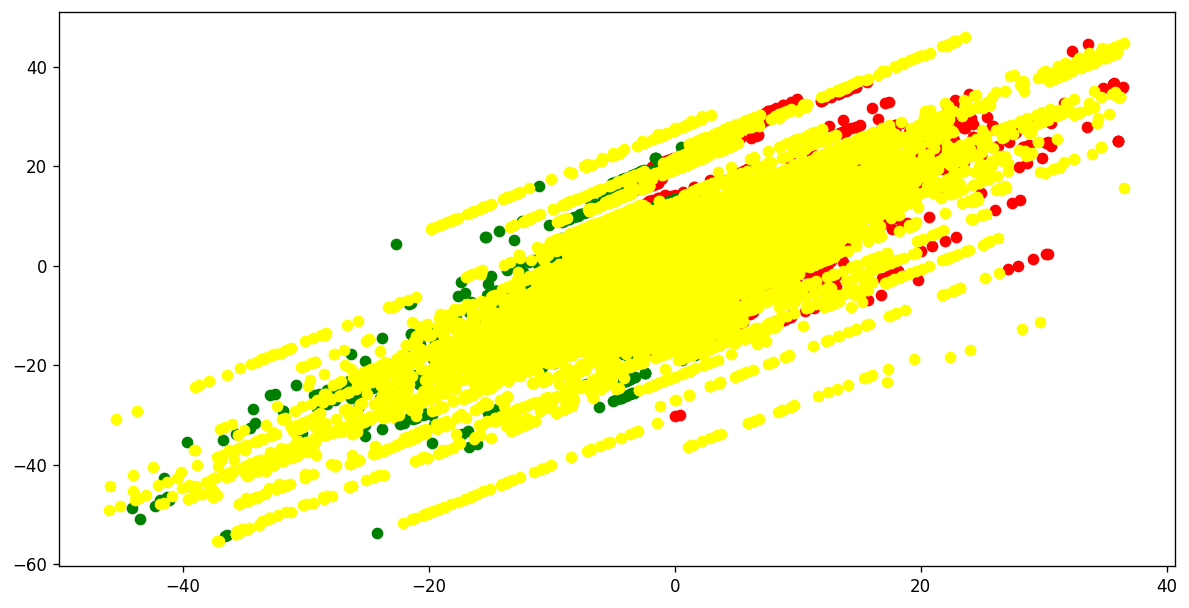

In [51]:
plt.scatter(working_group_high['rate_x'], working_group_high['rate_y'], c='red')
plt.scatter(working_group_low['rate_x'], working_group_low['rate_y'], c='green')
plt.scatter(working_group_none['rate_x'], working_group_none['rate_y'], c='yellow')

In [ ]:
# rate_x < 20 & rate_y < -5 => long
# rate_x > -20 & rate_y > 5 => short

In [46]:
# working_group_high.plot.scatter(x='rate_x', y='rate_y', c='red')
# working_group_low.plot.scatter(x='rate_x', y='rate_y', c='green')

In [30]:
#working_rate_x_y.plot.scatter(x='rate_x', y='rate_y', c='group', colormap='viridis')

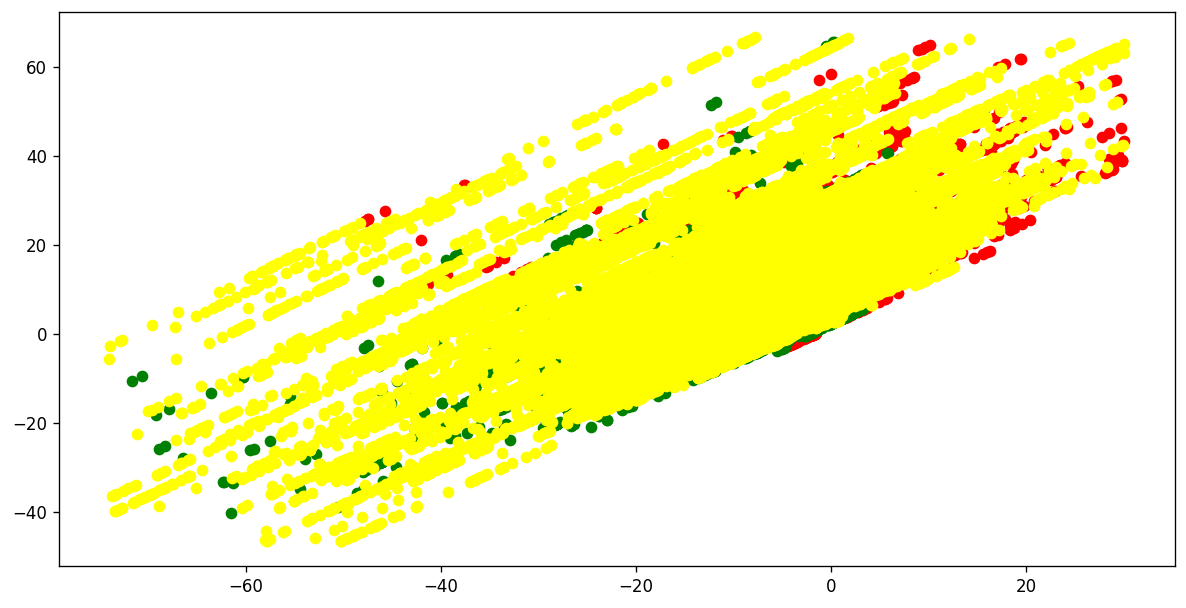

In [52]:
plt.scatter(working_group_high['rate_z'], working_group_high['rate_w'], c='red')
plt.scatter(working_group_low['rate_z'], working_group_low['rate_w'], c='green')
plt.scatter(working_group_none['rate_z'], working_group_none['rate_w'], c='yellow')

<Axes: xlabel='rate_z', ylabel='rate_w'>

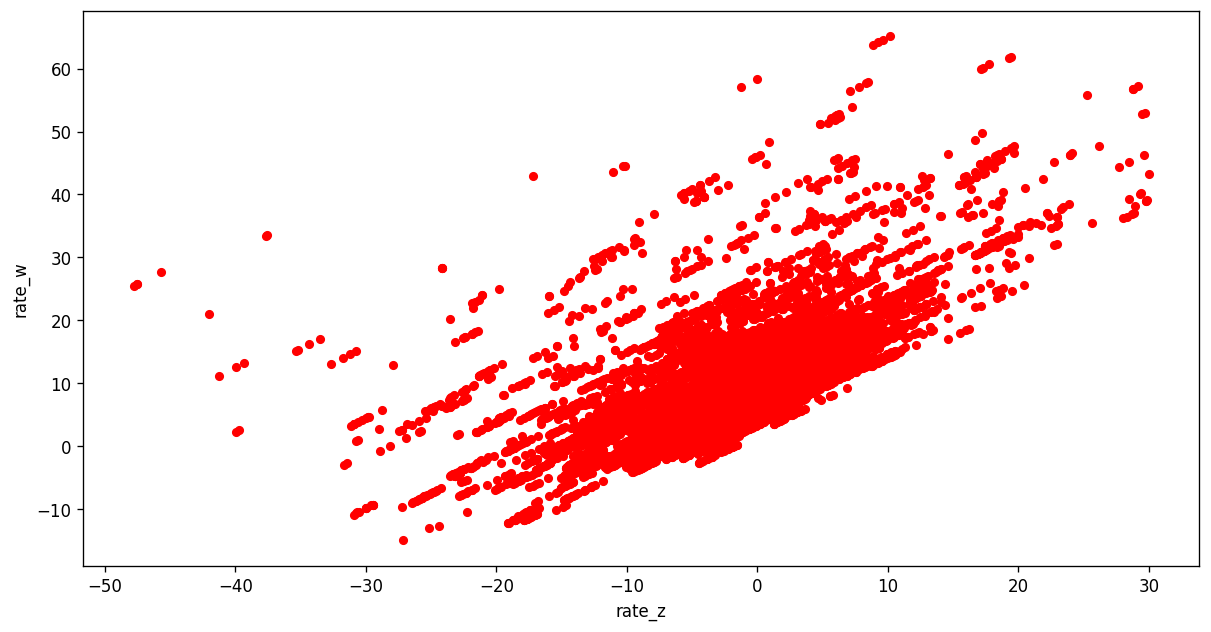

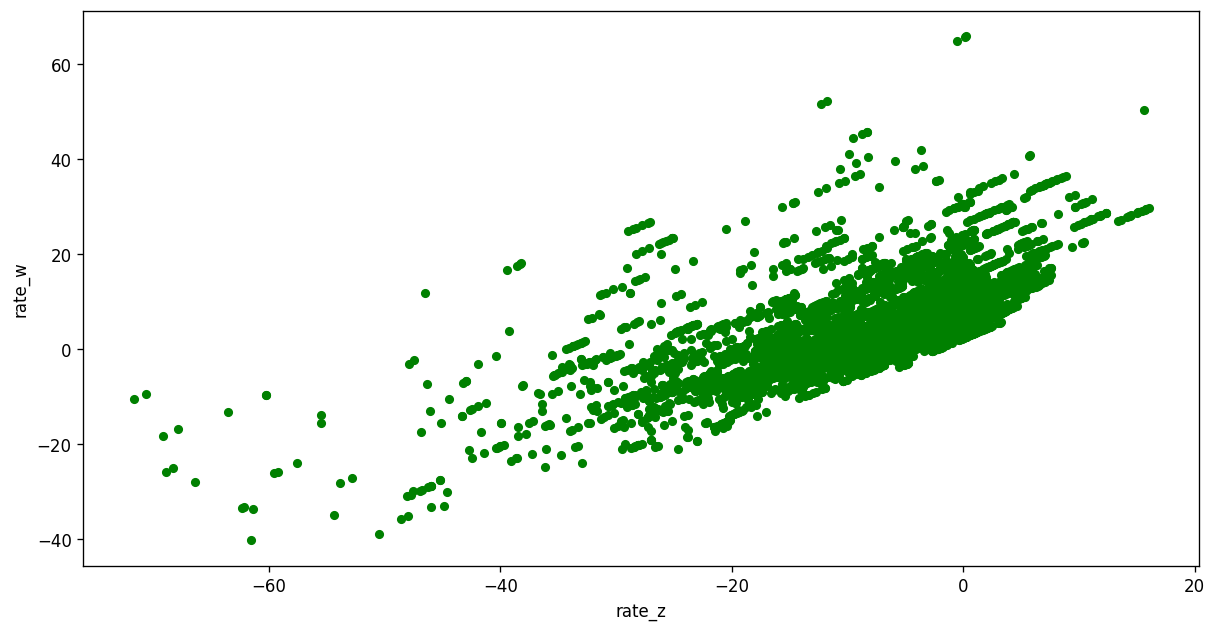

In [48]:
working_group_high.plot.scatter(x='rate_z', y='rate_w', c='red')
working_group_low.plot.scatter(x='rate_z', y='rate_w', c='green')

In [ ]:
#rate_z < -15 => long
#rate_z > 10 => short